# Part 2: Random Forest Regression Model

## Importing required libraries

In [1]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import sklearn

## Getting data

In [2]:
data=pd.read_csv('./network_backup_dataset.csv')
datanp = np.array(data.values)
X_train = datanp[:,[0,1,2,3,4]]
Y_train = datanp[:,[5]]
Y_train = Y_train.flatten()
Y_train = list(map(float,Y_train))
Y_train = np.asarray(Y_train)

In [3]:
X_train

array([[1, 'Monday', 1, 'work_flow_0', 'File_0'],
       [1, 'Monday', 1, 'work_flow_2', 'File_12'],
       [1, 'Monday', 1, 'work_flow_2', 'File_13'],
       ...,
       [15, 'Sunday', 21, 'work_flow_4', 'File_26'],
       [15, 'Sunday', 21, 'work_flow_4', 'File_25'],
       [15, 'Sunday', 21, 'work_flow_4', 'File_24']], dtype=object)

## LabelEncoding the data

In [4]:
for i in range(0,5):
    labelencoder_X_0 = LabelEncoder()
    X_train[:,i] = labelencoder_X_0.fit_transform(X_train[:,i])


In [5]:
X_train

array([[0, 1, 0, 0, 0],
       [0, 1, 0, 2, 4],
       [0, 1, 0, 2, 5],
       ...,
       [14, 3, 5, 4, 19],
       [14, 3, 5, 4, 18],
       [14, 3, 5, 4, 17]], dtype=object)

## Defining function for RandomForest

Set the parameters of your model with the following initial values.
* Number of trees: 20
* Depth of each tree: 4
* Bootstrap: True
* Maximum number of features: 5

In the random forest regression, since we use bootstrapping,
it's easier and faster to evaluate the generalization ability. For each tree, only a
subset of the data set is used to build it (because of sampling) so the data points
that are left out can be used as the test set. One can then define prediction-
RMSE for each tree and then average over all trees. In sklearn random forest
regression, oob score will return out of bag R2 score, so you can calcalute
1- oob score as Out Of Bag error.

In [7]:
def Rf_train_cf(X_train, Y_train, max_features, no_trees, depth = 4):
    kf = KFold(n_splits = 10)
    train_rmse = list()
    test_rmse = list()
    oob = list();
    kf.get_n_splits(X_train)
    for train, test in kf.split(X_train):
        lr =  RandomForestRegressor(n_estimators = no_trees, max_features = max_features, max_depth = depth, oob_score = True, bootstrap = True)
        lr.fit(X_train[train], Y_train[train])
        train_rmse.append(math.sqrt(metrics.mean_squared_error(Y_train[train], lr.predict(X_train[train]))))
        test_rmse.append(math.sqrt(metrics.mean_squared_error(Y_train[test], lr.predict(X_train[test]))))
        oob.append(1-lr.oob_score)
    print("Average Train-RMSE:")
    print(math.sqrt(np.average(train_rmse)))
    print("Average Test-RMSE:")
    print(math.sqrt(np.average(test_rmse)))
    print("Average Out of Bag Error")
    print(np.average(oob))
    print(lr.feature_importances_)
    return math.sqrt(np.average(train_rmse)),math.sqrt(np.average(test_rmse)),np.average(oob)


In [8]:
Rf_train_cf(X_train, Y_train, 5, 20, 4)

C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

Average Train-RMSE:
0.2754076224841854
Average Test-RMSE:
0.275398030662277
Average Out of Bag Error
0.0
[1.05308976e-05 3.38197112e-01 9.80268973e-02 5.61515023e-01
 2.25043627e-03]


(0.2754076224841854, 0.275398030662277, 0.0)

**Sweep over number of trees from 1 to 200 and maximum number of features
from 1 to 5, plot figure 1 for out of bag error(y axis) against number of
trees(x axis), figure 2 for average Test-RMSE(y axis) against number of
trees(x axis).**

C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

Average Train-RMSE:
0.3070598670855618
Average Test-RMSE:
0.3071709276368297
Average Out of Bag Error
0.0
[0.         0.12985643 0.15025113 0.60885376 0.11103868]


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

Average Train-RMSE:
0.2945805990504109
Average Test-RMSE:
0.2960063069632615
Average Out of Bag Error
0.0
[0.00548832 0.1679662  0.0817755  0.42499613 0.31977385]


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

Average Train-RMSE:
0.29354194055989635
Average Test-RMSE:
0.29485593212308703
Average Out of Bag Error
0.0
[0.0076044  0.16611    0.12560783 0.2924101  0.40826768]
Average Train-RMSE:
0.29219872093579013
Average Test-RMSE:
0.29267602721814107
Average Out of Bag Error
0.0
[0.00379217 0.14102381 0.10668905 0.49264317 0.25585181]
Average Train-RMSE:
0.29208720171050195
Average Test-RMSE:
0.2926768001712402
Average Out of Bag Error
0.0
[0.00435321 0.14038445 0.11332018 0.41021349 0.33172868]
Average Train-RMSE:
0.29346175545646347
Average Test-RMSE:
0.29445134378541654
Average Out of Bag Error
0.0
[0.00416738 0.15527012 0.11424413 0.35679217 0.3695262 ]
Average Train-RMSE:
0.2938224140431354
Average Test-RMSE:
0.29484716706368846
Average Out of Bag Error
0.0
[0.00661553 0.15674724 0.11007027 0.40024148 0.32632549]
Average Train-RMSE:
0.2933037940462006
Average Test-RMSE:
0.29418275538987576
Average Out of Bag Error
0.0
[0.00546782 0.17237759 0.10037439 0.36899754 0.35278267]
Average Train

C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

Average Train-RMSE:
0.2814077772149526
Average Test-RMSE:
0.28235089442580225
Average Out of Bag Error
0.0
[0.00116869 0.24292347 0.0946083  0.38986401 0.27143553]


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

Average Train-RMSE:
0.28045500778857785
Average Test-RMSE:
0.2813220007866158
Average Out of Bag Error
0.0
[0.00155952 0.2299908  0.09045592 0.47382759 0.20416617]
Average Train-RMSE:
0.2814580399148538
Average Test-RMSE:
0.28193820362788485
Average Out of Bag Error
0.0
[0.00187847 0.20755524 0.09487853 0.45688574 0.23880202]
Average Train-RMSE:
0.2807165469921229
Average Test-RMSE:
0.28155356150766647
Average Out of Bag Error
0.0
[0.00207247 0.23711697 0.09151724 0.39841564 0.27087769]
Average Train-RMSE:
0.2816357759329832
Average Test-RMSE:
0.2821704753624287
Average Out of Bag Error
0.0
[0.00187232 0.20432387 0.104736   0.37074601 0.3183218 ]
Average Train-RMSE:
0.2809601321633671
Average Test-RMSE:
0.28114459167859307
Average Out of Bag Error
0.0
[0.00240685 0.21742059 0.10284005 0.48447456 0.19285794]
Average Train-RMSE:
0.2813418786881968
Average Test-RMSE:
0.28207243976787155
Average Out of Bag Error
0.0
[0.00268031 0.22144372 0.10005421 0.36902521 0.30679655]
Average Train-RMS

C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So


0.2857339321014246
Average Test-RMSE:
0.2874446774098007
Average Out of Bag Error
0.0
[3.02626939e-03 2.27068661e-01 5.21726174e-02 7.17725405e-01
 7.04724606e-06]


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

Average Train-RMSE:
0.274440904930235
Average Test-RMSE:
0.2747903183793189
Average Out of Bag Error
0.0
[0.00122082 0.31760332 0.08945368 0.49480283 0.09691934]


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

Average Train-RMSE:
0.27328100103802855
Average Test-RMSE:
0.2733725462231438
Average Out of Bag Error
0.0
[0.00252751 0.30129127 0.09110138 0.41585034 0.18922949]
Average Train-RMSE:
0.27459742445850804
Average Test-RMSE:
0.2750142074014061
Average Out of Bag Error
0.0
[0.00079679 0.30215578 0.08763858 0.36757004 0.24183882]
Average Train-RMSE:
0.27498527175144505
Average Test-RMSE:
0.27506428873186034
Average Out of Bag Error
0.0
[0.00123926 0.28718404 0.09585132 0.37818697 0.23753841]
Average Train-RMSE:
0.2745077486503618
Average Test-RMSE:
0.2748404527722476
Average Out of Bag Error
0.0
[0.00110824 0.28180052 0.10140717 0.44584472 0.16983935]
Average Train-RMSE:
0.2742225862606159
Average Test-RMSE:
0.27479329919559947
Average Out of Bag Error
0.0
[0.00144374 0.32385218 0.09210334 0.42779678 0.15480395]
Average Train-RMSE:
0.2734870422619228
Average Test-RMSE:
0.27380581706125456
Average Out of Bag Error
0.0
[0.0014336  0.30302082 0.09947336 0.43189846 0.16417375]
Average Train-RM

C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

Average Train-RMSE:
0.27893919248639715
Average Test-RMSE:
0.27845339617471865
Average Out of Bag Error
0.0
[0.00050934 0.33726272 0.11085458 0.44260356 0.1087698 ]


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

Average Train-RMSE:
0.2707930737586559
Average Test-RMSE:
0.2712336294461717
Average Out of Bag Error
0.0
[3.48719753e-05 3.37607293e-01 1.15020714e-01 4.08104026e-01
 1.39233095e-01]


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

Average Train-RMSE:
0.27094803894783914
Average Test-RMSE:
0.27103057068702396
Average Out of Bag Error
0.0
[3.23816106e-04 3.71598807e-01 8.40730311e-02 4.90907710e-01
 5.30966358e-02]
Average Train-RMSE:
0.27097764040679734
Average Test-RMSE:
0.27093743375523904
Average Out of Bag Error
0.0
[2.60509051e-04 3.54841122e-01 8.85221854e-02 4.92249567e-01
 6.41266159e-02]
Average Train-RMSE:
0.27097293307423226
Average Test-RMSE:
0.270875396218559
Average Out of Bag Error
0.0
[1.41589296e-04 3.65475157e-01 8.85440517e-02 4.41685537e-01
 1.04153665e-01]
Average Train-RMSE:
0.2706377381388556
Average Test-RMSE:
0.2706353589373131
Average Out of Bag Error
0.0
[1.87627389e-04 3.36283572e-01 9.81914944e-02 4.55476246e-01
 1.09861060e-01]
Average Train-RMSE:
0.2706747737404916
Average Test-RMSE:
0.27058680363682064
Average Out of Bag Error
0.0
[1.50145146e-04 3.63281968e-01 8.85001653e-02 4.45466527e-01
 1.02601194e-01]
Average Train-RMSE:
0.27041826054522067
Average Test-RMSE:
0.27057084879058

C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

Average Train-RMSE:
0.2763319136142324
Average Test-RMSE:
0.2766734783243191
Average Out of Bag Error
0.0
[4.85085533e-06 3.20945985e-01 1.06724966e-01 5.70666218e-01
 1.65798120e-03]


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

Average Train-RMSE:
0.27573392621239534
Average Test-RMSE:
0.27590249082951235
Average Out of Bag Error
0.0
[1.20031455e-05 3.32375495e-01 1.01986369e-01 5.63439321e-01
 2.18681262e-03]


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

Average Train-RMSE:
0.2754865216383067
Average Test-RMSE:
0.27555554364696916
Average Out of Bag Error
0.0
[8.75012944e-06 3.25003610e-01 1.02872364e-01 5.70262744e-01
 1.85253178e-03]
Average Train-RMSE:
0.27547383228366645
Average Test-RMSE:
0.27570069765325056
Average Out of Bag Error
0.0
[1.11658296e-05 3.42926437e-01 9.53876792e-02 5.49838603e-01
 1.18361152e-02]
Average Train-RMSE:
0.27565779787827793
Average Test-RMSE:
0.27582707701903086
Average Out of Bag Error
0.0
[9.88682826e-06 3.20552323e-01 1.04645104e-01 5.73101211e-01
 1.69147607e-03]
Average Train-RMSE:
0.27528166650558644
Average Test-RMSE:
0.27541967190279387
Average Out of Bag Error
0.0
[1.23525001e-05 3.29134637e-01 1.03709599e-01 5.65026260e-01
 2.11715187e-03]
Average Train-RMSE:
0.2751798425090009
Average Test-RMSE:
0.2752968705552557
Average Out of Bag Error
0.0
[7.60364884e-06 3.31170691e-01 1.01446763e-01 5.65180012e-01
 2.19493096e-03]
Average Train-RMSE:
0.2752907985013752
Average Test-RMSE:
0.2753996749770

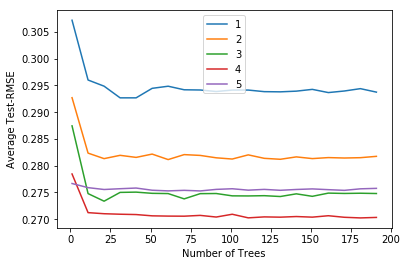

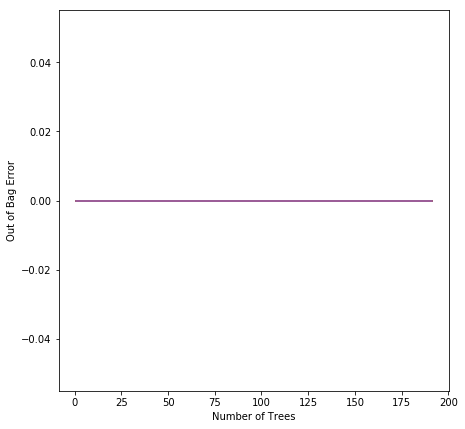

<Figure size 504x504 with 0 Axes>

No handles with labels found to put in legend.


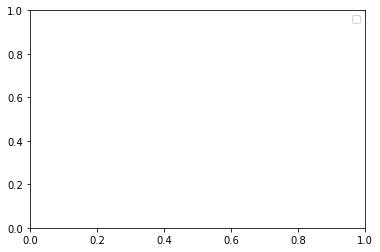

In [11]:

plt.close()
max = 1000;
max_i = 0; #Best feature
max_j = 0; #Best no. of trees
plt.figure(1)
plt.figure(figsize=(7,7))
plt.figure(2)
plt.figure(figsize=(7,7))

plt.figure(1)
plt.xlabel("Number of Trees")
plt.ylabel("Average Test-RMSE")

plt.figure(2)
plt.xlabel("Number of Trees")
plt.ylabel("Out of Bag Error")

for i in range(1,6):
    test_rmse = list()
    oob = list()
    for j in range(1,201,10):
        x,y,z = Rf_train_cf(X_train, Y_train, i, j,4) #x =train_rmse, y = test_rmse, z = oob
        test_rmse.append(y)
        oob.append(z)
        if(y < max):
            max = y
            max_i = i
            max_j = j
    plt.figure(1)
    plt.plot(range(1,201,10),test_rmse, label = i)
    plt.figure(2)
    plt.plot(range(1,201,10),oob, label = i)

print("Best parameters for RF") 
print("Best number of features "+ str(max_i))
print("Best number of trees "+ str(max_j))

plt.figure(1)
plt.legend()
plt.savefig("test_rmse vs no_of_trees.png")
plt.show()
plt.close()

plt.figure(2)
plt.legend()
plt.savefig("oob vs no_of_trees.png")
plt.show()
plt.close()


**Feature experimented upon is max_depth**

C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

Average Train-RMSE:
0.31232780381396397
Average Test-RMSE:
0.3125364326949281
Average Out of Bag Error
0.0
[0. 0. 0. 1. 0.]


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

Average Train-RMSE:
0.31130982852840283
Average Test-RMSE:
0.3110646841351401
Average Out of Bag Error
0.0
[0.         0.         0.         0.81818182 0.18181818]


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

Average Train-RMSE:
0.31112200186266864
Average Test-RMSE:
0.3110590522194378
Average Out of Bag Error
0.0
[0.         0.         0.         0.85714286 0.14285714]


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


Average Train-RMSE:
0.3111345689733754
Average Test-RMSE:
0.3109909764969421
Average Out of Bag Error
0.0
[0.         0.         0.         0.77419355 0.22580645]
Average Train-RMSE:
0.31125920680110575
Average Test-RMSE:
0.31094281787367517
Average Out of Bag Error
0.0
[0.         0.         0.         0.82926829 0.17073171]
Average Train-RMSE:
0.3111907976319339
Average Test-RMSE:
0.3109318213520302
Average Out of Bag Error
0.0
[0.        0.        0.        0.8627451 0.1372549]
Average Train-RMSE:
0.3110935628042661
Average Test-RMSE:
0.3108576660280995
Average Out of Bag Error
0.0
[0.         0.         0.         0.80327869 0.19672131]
Average Train-RMSE:
0.3111334600156928
Average Test-RMSE:
0.31094413090443845
Average Out of Bag Error
0.0
[0.         0.         0.         0.85915493 0.14084507]
Average Train-RMSE:
0.3111769862254666
Average Test-RMSE:
0.31087911824613557
Average Out of Bag Error
0.0
[0.         0.         0.         0.80246914 0.19753086]
Average Train-RMSE:
0.3

C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

Average Train-RMSE:
0.25575753588501565
Average Test-RMSE:
0.25771959629780494
Average Out of Bag Error
0.0
[0.         0.42714602 0.20571715 0.12622407 0.24091276]


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

Average Train-RMSE:
0.23886839145043243
Average Test-RMSE:
0.23849566483352339
Average Out of Bag Error
0.0
[0.00081521 0.39736094 0.15921606 0.37678403 0.06582375]


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

Average Train-RMSE:
0.2386144848681228
Average Test-RMSE:
0.23825711395907107
Average Out of Bag Error
0.0
[0.00044237 0.42650626 0.15747064 0.33549915 0.08008158]
Average Train-RMSE:
0.2380013156522513
Average Test-RMSE:
0.23748320781356203
Average Out of Bag Error
0.0
[0.00049612 0.41307193 0.16152259 0.3470679  0.07784146]
Average Train-RMSE:
0.23747387999011385
Average Test-RMSE:
0.2372903867698557
Average Out of Bag Error
0.0
[2.00749514e-04 3.87797581e-01 1.78717661e-01 3.65671856e-01
 6.76121517e-02]
Average Train-RMSE:
0.23721299113917385
Average Test-RMSE:
0.23683663668249963
Average Out of Bag Error
0.0
[2.06846332e-04 4.05624788e-01 1.82125362e-01 3.32212200e-01
 7.98308032e-02]
Average Train-RMSE:
0.2373597642147706
Average Test-RMSE:
0.2370035226416693
Average Out of Bag Error
0.0
[2.42134414e-04 4.13050855e-01 1.52988117e-01 3.69501727e-01
 6.42171670e-02]
Average Train-RMSE:
0.2374371068496171
Average Test-RMSE:
0.23698855077010147
Average Out of Bag Error
0.0
[2.2796187

C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

Average Train-RMSE:
0.1269149714589599
Average Test-RMSE:
0.1300800724626496
Average Out of Bag Error
0.0
[0.00114593 0.25766112 0.30145655 0.42051276 0.01922364]


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

Average Train-RMSE:
0.11073475126160201
Average Test-RMSE:
0.11591854600068552
Average Out of Bag Error
0.0
[0.00263033 0.31941317 0.36800211 0.27768093 0.03227346]


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

Average Train-RMSE:
0.10941575759972987
Average Test-RMSE:
0.11502253663038274
Average Out of Bag Error
0.0
[0.00270874 0.3405593  0.35808849 0.23042018 0.0682233 ]
Average Train-RMSE:
0.10942897724593038
Average Test-RMSE:
0.1141303658275551
Average Out of Bag Error
0.0
[0.00294216 0.35442227 0.32443957 0.24070497 0.07749103]
Average Train-RMSE:
0.1092986766467805
Average Test-RMSE:
0.11422437823417876
Average Out of Bag Error
0.0
[0.00307978 0.35618702 0.3372467  0.25669122 0.04679528]
Average Train-RMSE:
0.10909601847368874
Average Test-RMSE:
0.1141769659336179
Average Out of Bag Error
0.0
[0.00244204 0.3572842  0.33748409 0.23722946 0.06556021]
Average Train-RMSE:
0.10906055502044167
Average Test-RMSE:
0.11424608426013436
Average Out of Bag Error
0.0
[0.00274932 0.33788231 0.3493875  0.24503617 0.06494469]
Average Train-RMSE:
0.10899283830999719
Average Test-RMSE:
0.11403986749506616
Average Out of Bag Error
0.0
[0.00259786 0.34402205 0.33030722 0.25755052 0.06552234]
Average Train

C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

Average Train-RMSE:
0.11176753626098647
Average Test-RMSE:
0.13118650777277016
Average Out of Bag Error
0.0
[0.00472283 0.31675922 0.38734488 0.27588618 0.01528689]


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

Average Train-RMSE:
0.09540474756604832
Average Test-RMSE:
0.11900220315561182
Average Out of Bag Error
0.0
[0.00586119 0.32712019 0.36516018 0.24850025 0.05335819]


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

Average Train-RMSE:
0.09452396428136345
Average Test-RMSE:
0.11899411613556332
Average Out of Bag Error
0.0
[0.0057211  0.32917674 0.34791349 0.26009387 0.05709481]
Average Train-RMSE:
0.09409560305975338
Average Test-RMSE:
0.1178327446190503
Average Out of Bag Error
0.0
[0.00654659 0.342489   0.32492757 0.25585656 0.07018028]
Average Train-RMSE:
0.09383338749258197
Average Test-RMSE:
0.11776717308726067
Average Out of Bag Error
0.0
[0.00576099 0.34272198 0.35623001 0.24627182 0.0490152 ]
Average Train-RMSE:
0.09366527270871303
Average Test-RMSE:
0.1179187650555399
Average Out of Bag Error
0.0
[0.00596005 0.34190837 0.3278909  0.2615776  0.06266308]
Average Train-RMSE:
0.09359816213138833
Average Test-RMSE:
0.11742055106188572
Average Out of Bag Error
0.0
[0.00650995 0.33716334 0.34451236 0.26475091 0.04706344]
Average Train-RMSE:
0.09350903825004575
Average Test-RMSE:
0.11727165479779435
Average Out of Bag Error
0.0
[0.00637989 0.32727775 0.34279197 0.26094941 0.06260098]
Average Trai

C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

Average Train-RMSE:
0.10625197743963327
Average Test-RMSE:
0.13573718214034663
Average Out of Bag Error
0.0
[0.00602844 0.33260452 0.39241683 0.26148666 0.00746356]


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

Average Train-RMSE:
0.080334831940058
Average Test-RMSE:
0.1221042054015688
Average Out of Bag Error
0.0
[0.00824132 0.39210376 0.34440398 0.21288141 0.04236952]


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

Average Train-RMSE:
0.07849711631539895
Average Test-RMSE:
0.12176427568410304
Average Out of Bag Error
0.0
[0.00838958 0.36497266 0.32842502 0.24100833 0.05720441]
Average Train-RMSE:
0.07788823131382872
Average Test-RMSE:
0.12158531973879008
Average Out of Bag Error
0.0
[0.00910335 0.31983581 0.35562491 0.24982646 0.06560946]
Average Train-RMSE:
0.07723212119015169
Average Test-RMSE:
0.12160584909816902
Average Out of Bag Error
0.0
[0.00852591 0.34815767 0.32582279 0.25827609 0.05921754]
Average Train-RMSE:
0.07705035371880568
Average Test-RMSE:
0.12097607238439181
Average Out of Bag Error
0.0
[0.0086617  0.3444759  0.3302502  0.2515393  0.06507291]
Average Train-RMSE:
0.07689550814499362
Average Test-RMSE:
0.12100049611522384
Average Out of Bag Error
0.0
[0.00840256 0.32819814 0.33381343 0.26462218 0.06496369]
Average Train-RMSE:
0.07664380395033461
Average Test-RMSE:
0.1211926057584571
Average Out of Bag Error
0.0
[0.00850821 0.33889775 0.33872871 0.25792165 0.05594368]
Average Tra

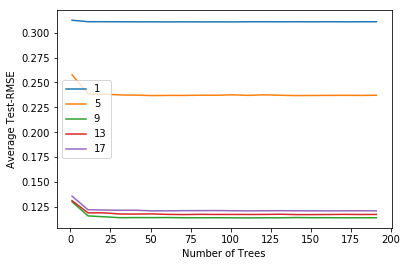

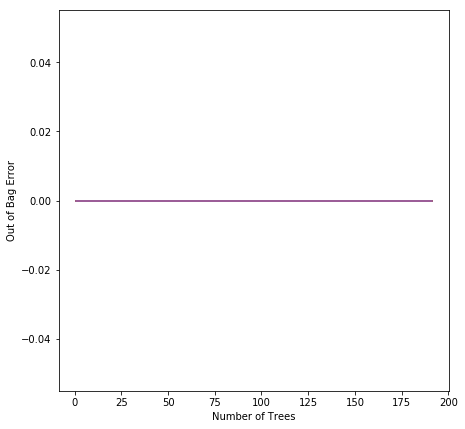

<Figure size 504x504 with 0 Axes>

No handles with labels found to put in legend.


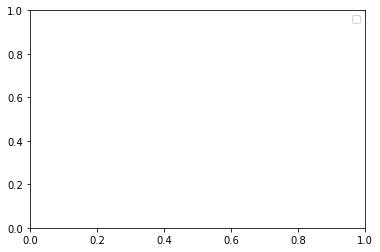

In [12]:
max = 1000;
max_k = 0; #Best Depth
max_l = 0; #Best no. of trees
plt.figure(1)
plt.figure(figsize=(7,7))
plt.figure(2)
plt.figure(figsize=(7,7))

plt.figure(1)
plt.xlabel("Number of Trees")
plt.ylabel("Average Test-RMSE")

plt.figure(2)
plt.xlabel("Number of Trees")
plt.ylabel("Out of Bag Error")

for i in range(1,21,4):
    test_rmse = list()
    oob = list()
    for j in range(1,201,10):
        x,y,z = Rf_train_cf(X_train, Y_train, max_i, j,i) #x =train_rmse, y = test_rmse, z = oob
        test_rmse.append(y)
        oob.append(z)
        if(y < max):
            max = y
            max_k = i
            max_l = j
    plt.figure(1)
    plt.plot(range(1,201,10),test_rmse, label = i)
    plt.figure(2)
    plt.plot(range(1,201,10),oob, label = i)

print("Best parameters") 
print("Best max_depth "+ str(max_k))

plt.figure(1)
plt.legend()
plt.savefig("depth_rmse.png")
plt.show()
plt.close()

plt.figure(2)
plt.legend()
plt.savefig("depth_oob.png")
plt.show()
plt.close()

## Plot figure function

In [13]:
def plot(predictions, Y_train):
    plt.close()
    plt.figure(figsize=(7,7))
    plt.xlabel("Time")
    plt.ylabel("Fitted Values vs True Values")
    plt.scatter(range(0,len(Y_train)),Y_train,label='True')
    plt.scatter(range(0,len(Y_train)),predictions, label ='Fitted')
    plt.legend()
    plt.savefig("RF_1.png")
    plt.show()
    plt.close()
    
    plt.figure(figsize=(7,7))
    plt.xlabel("True Values")
    plt.ylabel("Prediction Values")
    plt.scatter(Y_train,predictions)
    plt.savefig("RF_2.png")
    plt.show()
    plt.close()
    
    plt.figure(figsize=(7,7))
    plt.xlabel("Time")
    plt.ylabel("Residual Values vs Predicted Values")
    plt.scatter(range(0,len(Y_train)),predictions,label='Fitted')
    plt.scatter(range(0,len(Y_train)),Y_train-predictions, label ='Residual')
    plt.legend()
    plt.savefig("RF_3.png")  
    plt.show()
    plt.close()
    
    plt.figure(figsize=(7,7))
    plt.xlabel("Prediction Values")
    plt.ylabel("Residual Values")
    plt.scatter(predictions,Y_train-predictions)
    plt.savefig("RF_4.png")
    plt.show()
    plt.close()


Best RF model with plugged-in parameters


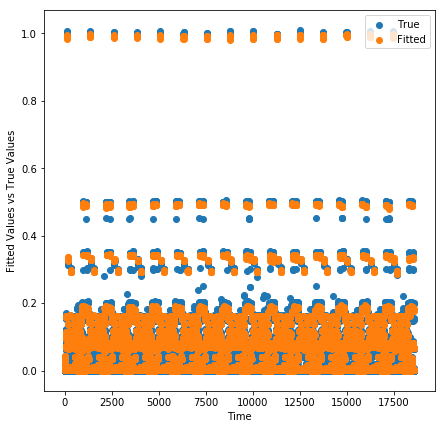

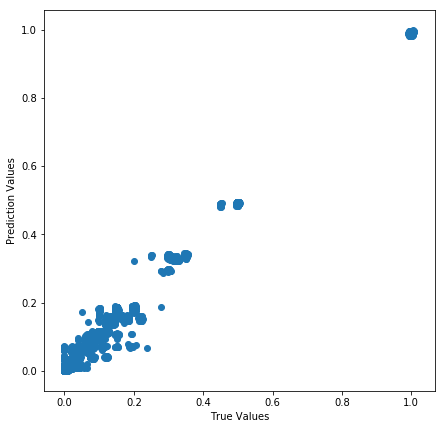

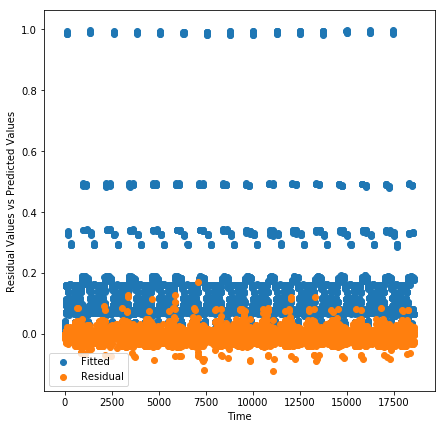

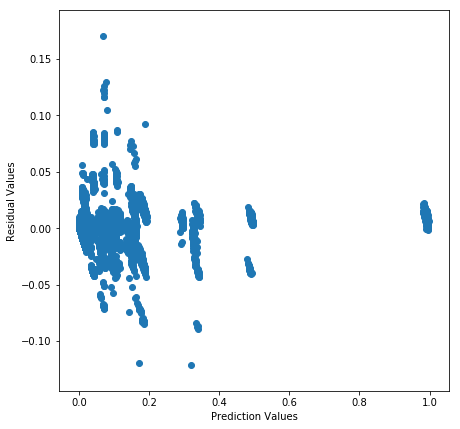

In [14]:
print("Best RF model with plugged-in parameters")
lr =  RandomForestRegressor(n_estimators = max_j, max_features = max_i, max_depth = max_k, oob_score = True, bootstrap = True)
lr.fit(X_train,Y_train)
predictions = lr.predict(X_train)
plot(predictions, Y_train)

## Feature importances of the best model

In [15]:
print(lr.feature_importances_)

[0.00224716 0.33182564 0.33965989 0.26704967 0.05921763]


The feature importances that we observed from the best random forest regression are:
* Week index: 0.00224716
* Day of the week at which the backup started: 0.33182564
* Backup start time: 0.33965989
* Workflow ID: 0.26704967
* File name: 0.05921763

**Higher the f-score (or, lower the p-value), more important is the feature. So, observing the
obtained values, we can see that the feature ‘Backup start time’ is the most important feature,
whereas, ‘week index’ is the least important one.**

## Visualize your decision trees. Pick any tree (estimator) in best random forest (with max depth=4) and plot its structure

In [16]:
sklearn.tree.export_graphviz(decision_tree= lr.estimators_[0], max_depth = 4 , out_file='tree.dot')

In [20]:
#help(sklearn.tree.export_graphviz)

#### Visualising the tree

Go to [this site](https://dreampuf.github.io/GraphvizOnline/#digraph%20G%20%7B%0A%0A%20%20subgraph%20cluster_0%20%7B%0A%20%20%20%20style%3Dfilled%3B%0A%20%20%20%20color%3Dlightgrey%3B%0A%20%20%20%20node%20%5Bstyle%3Dfilled%2Ccolor%3Dwhite%5D%3B%0A%20%20%20%20a0%20-%3E%20a1%20-%3E%20a2%20-%3E%20a3%3B%0A%20%20%20%20label%20%3D%20%22process%20%231%22%3B%0A%20%20%7D%0A%0A%20%20subgraph%20cluster_1%20%7B%0A%20%20%20%20node%20%5Bstyle%3Dfilled%5D%3B%0A%20%20%20%20b0%20-%3E%20b1%20-%3E%20b2%20-%3E%20b3%3B%0A%20%20%20%20label%20%3D%20%22process%20%232%22%3B%0A%20%20%20%20color%3Dblue%0A%20%20%7D%0A%20%20start%20-%3E%20a0%3B%0A%20%20start%20-%3E%20b0%3B%0A%20%20a1%20-%3E%20b3%3B%0A%20%20b2%20-%3E%20a3%3B%0A%20%20a3%20-%3E%20a0%3B%0A%20%20a3%20-%3E%20end%3B%0A%20%20b3%20-%3E%20end%3B%0A%0A%20%20start%20%5Bshape%3DMdiamond%5D%3B%0A%20%20end%20%5Bshape%3DMsquare%5D%3B%0A%7D)

Just replace the code inside editer with your code.

Save the image as tree.png

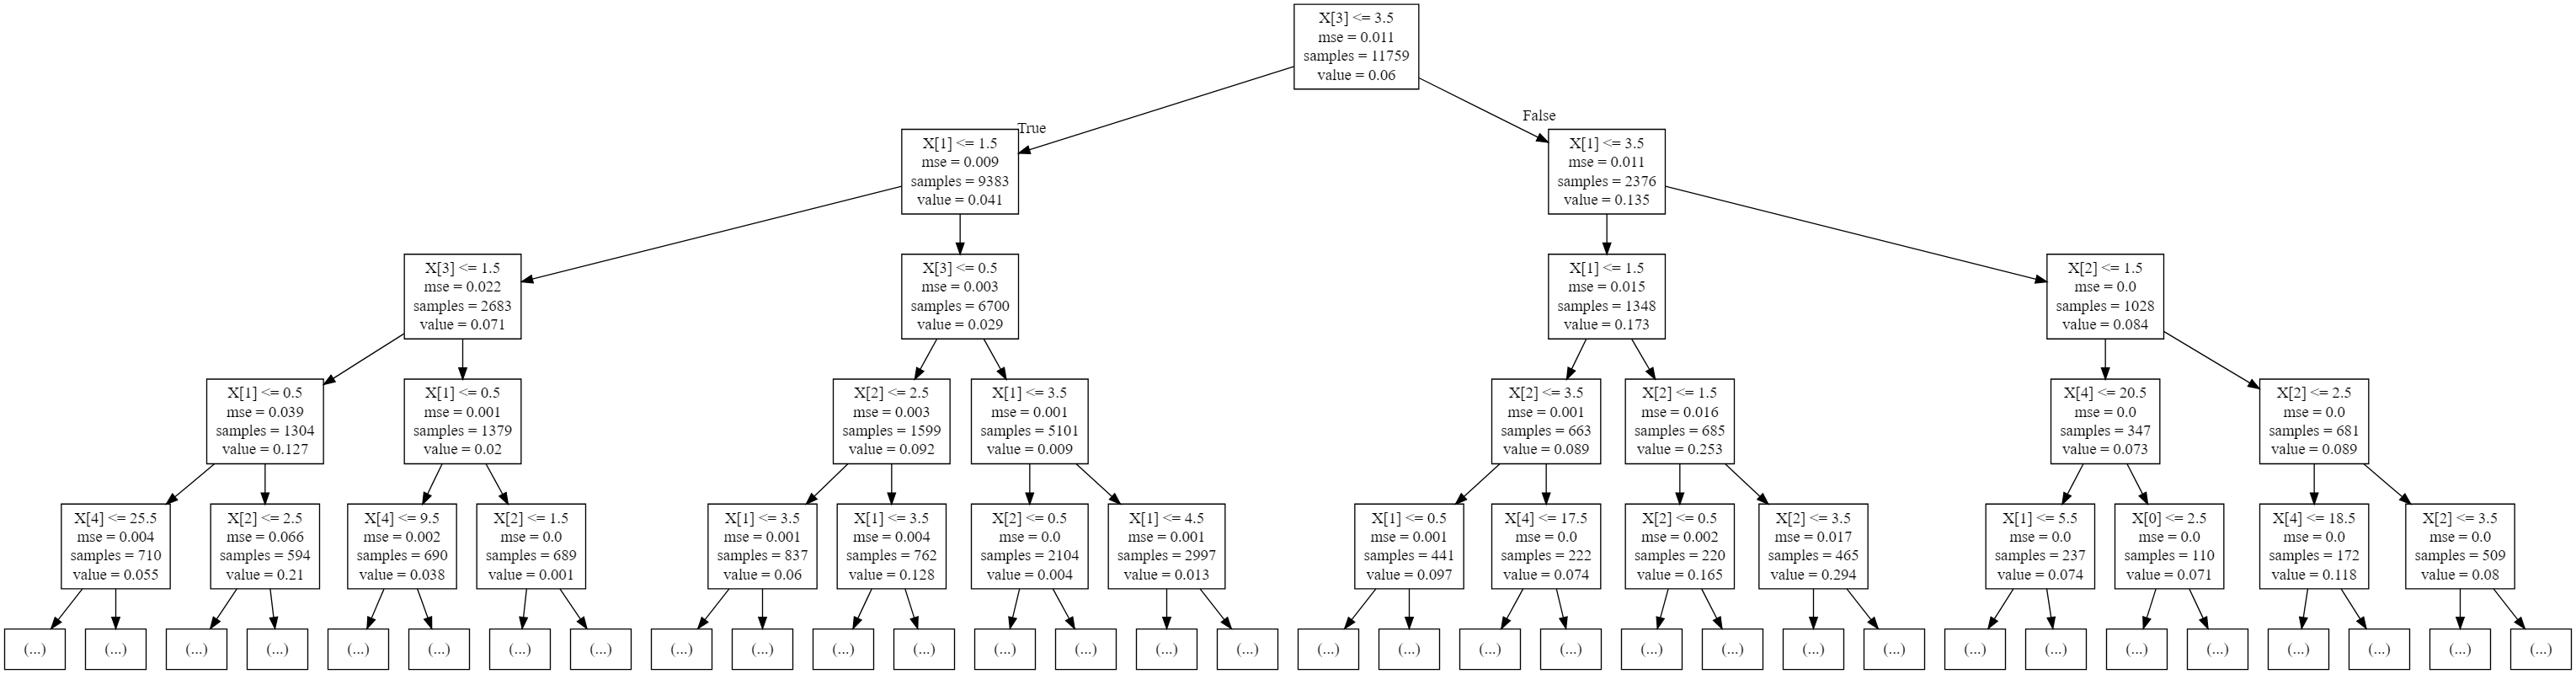

In [68]:
from IPython.display import Image
Image(filename='tree.png')

We use a random estimator from the best RF model we have obtained using the previous parts’
analysis, to carve the dot tree (Decision Tree). As can be seen from the tree, the root node splits
the data on the feature ‘Workflow ID’, which is one of the most important features, as seen by
the feature importance reported by the regressor. But, the root node in the best tree in our random
forest would split on the feature ‘Backup start time’, which has the highest feature importance.